In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
df = pd.read_csv('/content/diabetes (1).csv')
warnings.filterwarnings('ignore')

In [ ]:
df['Glucose']=np.where(df['Glucose']==0,df['Glucose'].median(),df['Glucose'])
df['SkinThickness']=np.where(df['SkinThickness']==0,df['SkinThickness'].median(),df['SkinThickness'])
df['BloodPressure']=np.where(df['BloodPressure']==0,df['BloodPressure'].median(),df['BloodPressure'])
df['BMI']=np.where(df['BMI']==0,df['BMI'].median(),df['BMI'])

<Axes: >

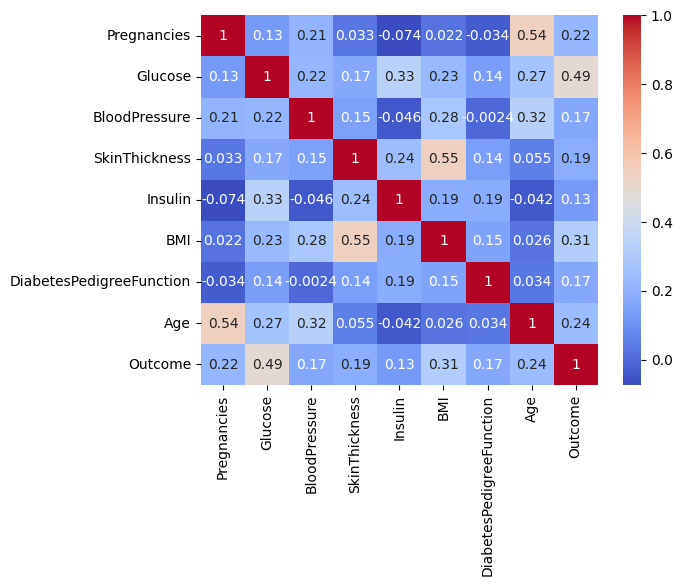

In [ ]:
# Correlation Matrix with each of the values in the Dataframe
sns.heatmap(df.corr(),annot=True, cmap ='coolwarm')

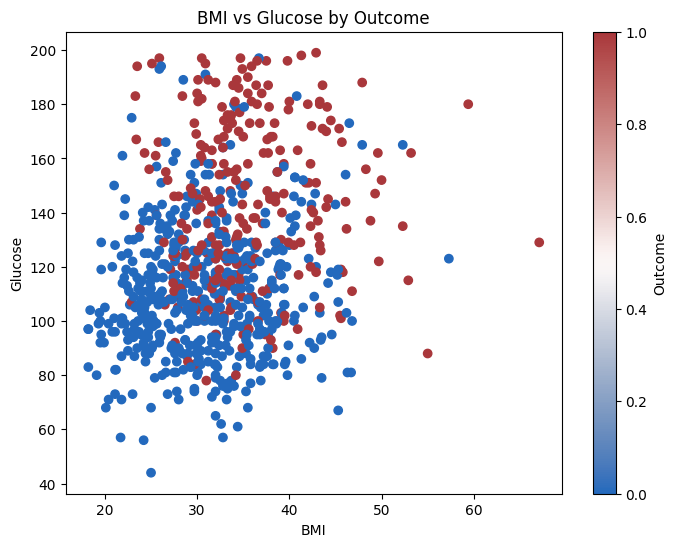

In [ ]:
# BMI and Glucose by Diabetes Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df['BMI'], df['Glucose'], c=df['Outcome'], cmap='vlag')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('BMI vs Glucose by Outcome')
plt.colorbar(label='Outcome')

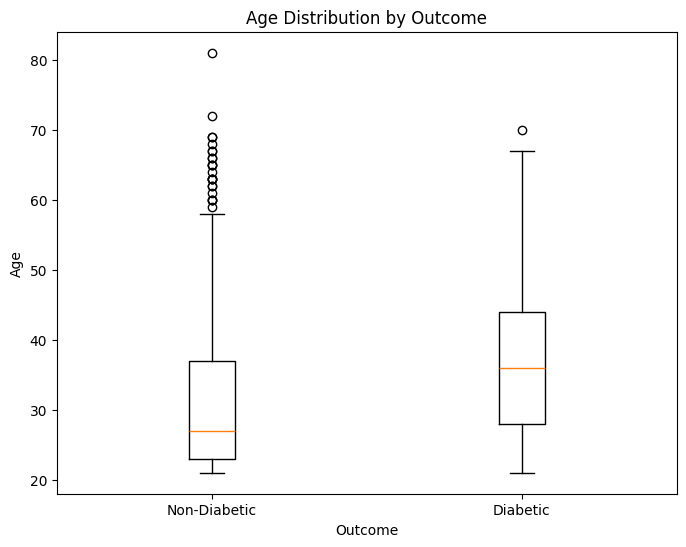

In [ ]:
# Age distribution between diabetics and non-diabetics by BoxPlot
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Outcome'] == 0]['Age'], df[df['Outcome'] == 1]['Age']], labels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Outcome')
plt.ylabel('Age')
_ = plt.title('Age Distribution by Outcome')

Text(0.5, 1.0, 'Blood Pressure Distribution by Outcome')

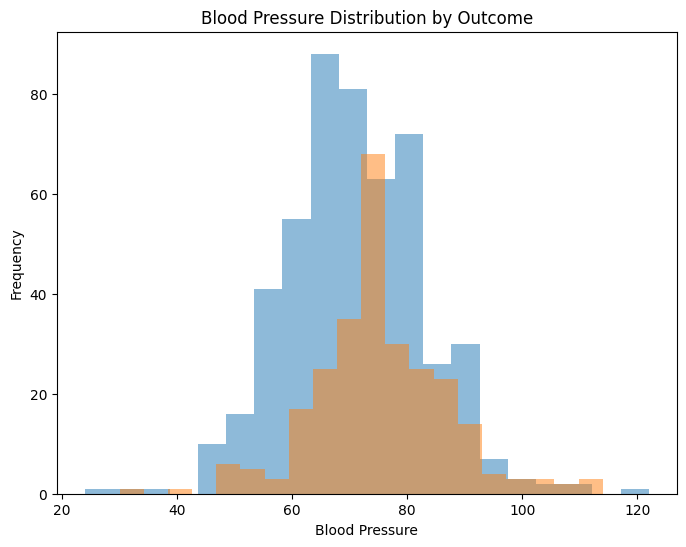

In [ ]:
#Defining a plot for Blood pressure Distributions by Diabetic and Non-Diabetic
plt.figure(figsize=(8, 6))
plt.hist(df[df['Outcome'] == 0]['BloodPressure'], bins=20, alpha=0.5, label='Non-Diabetic')
plt.hist(df[df['Outcome'] == 1]['BloodPressure'], bins=20, alpha=0.5, label='Diabetic')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.title('Blood Pressure Distribution by Outcome')

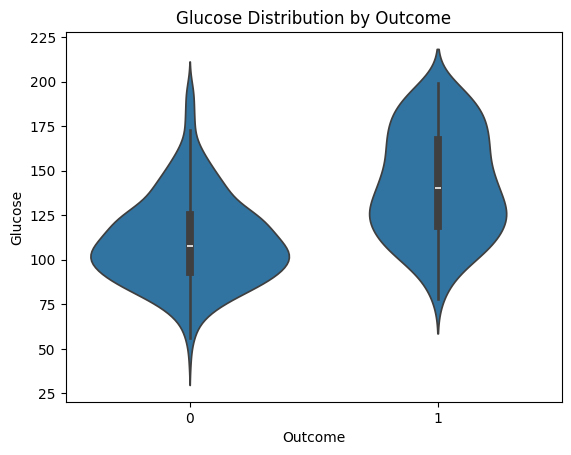

In [ ]:
# Create the violin plot
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

In [ ]:
# Model number 1 Simple Linear Regression
X = df[['Glucose']]
Y = df['Outcome']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X,Y))

0.24283449760827291


In [ ]:
#Model Number 2 Multiple Linear Regression
Z = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction',	'Age']]
lm.fit(Z,Y)
#Evaluate model and accuracy
print(lm.score(Z,Y))

0.32337902331152135


In [ ]:
#Model Number 3 Polynomial Regression
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
#Evaluate model and accuracy
print(r2_score(Y,ypipe))

0.3805226326522184


In [ ]:
# Model Number 4: Logistic regression model
Z_train, Z_test, Y_train, Y_test = train_test_split(Z, Y, test_size=0.2, random_state=0)
LR_model = LogisticRegression()
LR_model.fit(Z,Y)
Y_pred = LR_model.predict(Z_test)
# Evaluate the model and accuracy
accuracy = accuracy_score(Y_test,Y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.8246753246753247


In [ ]:
# Model number 5: Random Forest
rf_model = RandomForestClassifier(n_estimators=1000, random_state=0)
rf_model.fit(Z_train, Y_train)
Y_pred_rf = rf_model.predict(Z_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.8181818181818182


In [ ]:
# Model Number 6: Support Vector Machine
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(Z_train, Y_train)
Y_pred_svm = svm_model.predict(Z_test)
# Evaluate the model's accuracy
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.7987012987012987


In [ ]:
#Model Number 7: K Nearest Neighbor
neighbor_settings = range(1,20)
knn_model = KNeighborsClassifier()
for n_neighbors in neighbor_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(Z_train, Y_train)
    Y_pred_knn = knn.predict(Z_test)
    accuracy = accuracy_score(Y_test, Y_pred_knn)
    print(f"KNN Accuracy with {n_neighbors} neighbors: {accuracy}")

KNN Accuracy with 1 neighbors: 0.6493506493506493
KNN Accuracy with 2 neighbors: 0.6883116883116883
KNN Accuracy with 3 neighbors: 0.6558441558441559
KNN Accuracy with 4 neighbors: 0.6948051948051948
KNN Accuracy with 5 neighbors: 0.6623376623376623
KNN Accuracy with 6 neighbors: 0.7012987012987013
KNN Accuracy with 7 neighbors: 0.6753246753246753
KNN Accuracy with 8 neighbors: 0.7207792207792207
KNN Accuracy with 9 neighbors: 0.7142857142857143
KNN Accuracy with 10 neighbors: 0.7597402597402597
KNN Accuracy with 11 neighbors: 0.7337662337662337
KNN Accuracy with 12 neighbors: 0.7857142857142857
KNN Accuracy with 13 neighbors: 0.7402597402597403
KNN Accuracy with 14 neighbors: 0.7402597402597403
KNN Accuracy with 15 neighbors: 0.7272727272727273
KNN Accuracy with 16 neighbors: 0.7337662337662337
KNN Accuracy with 17 neighbors: 0.7337662337662337
KNN Accuracy with 18 neighbors: 0.7467532467532467
KNN Accuracy with 19 neighbors: 0.7402597402597403


In [ ]:
# Hyperparameter tuning for Logistic Regression
param_grid = {'C': np.logspace  (-4, 4, 20),
              'penalty': ['l1', 'l2','elasticnet','none'],
              'solver': ['liblinear','lbfgs','sag','saga','newton-cg'],
              'max_iter' : [100,1000,2500, 5000]
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5,verbose = True, n_jobs = 1)
best_LR_model = grid_search.fit(Z_train, Y_train)
print(f'Accuracy: {best_LR_model.score(Z_test, Y_test):.3f}')
print("The best parameters are:", best_LR_model.best_params_)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Accuracy: 0.818
The best parameters are: {'C': 0.615848211066026, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
